### Student Information
Name: 廖榮健

Student ID: 411855165

GitHub ID: https://github.com/bryankb10

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [70]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
import helpers.data_mining_helpers as dmh

df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv", usecols = ['type', 'subreddit', 'author', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'entities', 'sentiment'])
df

type         subreddit                author  upvotes  downvotes  \
0    comment    wallstreetbets          StickyTip420        0        NaN   
1    comment    wallstreetbets  Comfortable-Dog-8437      -15        NaN   
2    comment       StockMarket          Btankersly66        1        NaN   
3       post  stockstobuytoday             emiljenfn       30        0.0   
4    comment       StockMarket          Just-Big6411        1        NaN   
..       ...               ...                   ...      ...        ...   
842  comment  stockstobuytoday   Ordinary-Office9180        1        NaN   
843  comment       StockMarket            lulububudu        2        NaN   
844     post  stockstobuytoday               saasfin        1        0.0   
845  comment    wallstreetbets          yes_ur_wrong       10        NaN   
846  comment    wallstreetbets           I_am_Nerman        1        NaN   

     upvote_ratio                                               text  \
0             NaN                                   Calls on retards   
1             NaN  Stunt as in like why did they even make a big ...   
2             NaN                  Seeing lots of red in the ticker.   
3            0.98  Vision Marine Technologies Inc. is rewriting t...   
4             NaN                           He didn’t say thank you.   
..            ...                                                ...   
842           NaN        Invest now it is going to shoot up tomorrow   
843           NaN                             Where can I read this?   
844          1.00  Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...   
845           NaN  i sold my puts so i expect cheeto to declare w...   
846           NaN                       ![img](emote|t5_2th52|31224)   

     sentiment                                           entities  
0         -1.0                                                 []  
1          1.0              ['Stunt', 'company', 'deal', 'place']  
2          0.0                                         ['ticker']  
3          1.0  ['watercraft', 'skill', 'power', ']', 'feat', ...  
4          0.0                                                 []  
..         ...                                                ...  
842        0.0                                       ['tomorrow']  
843        0.0                                                 []  
844        0.0  ['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...  
845        0.0                  ['war', 'denmark', 'cheeto', 'i']  
846        0.0          ['img', ']', '[', 'emote|t5_2th52|31224']  

[847 rows x 9 columns]

In [72]:
df.head(3)

type       subreddit                author  upvotes  downvotes  \
0  comment  wallstreetbets          StickyTip420        0        NaN   
1  comment  wallstreetbets  Comfortable-Dog-8437      -15        NaN   
2  comment     StockMarket          Btankersly66        1        NaN   

   upvote_ratio                                               text  sentiment  \
0           NaN                                   Calls on retards       -1.0   
1           NaN  Stunt as in like why did they even make a big ...        1.0   
2           NaN                  Seeing lots of red in the ticker.        0.0   

                                entities  
0                                     []  
1  ['Stunt', 'company', 'deal', 'place']  
2                             ['ticker']

In [73]:
for i, row in df[:3].iterrows():
    print(f"{i+1}. {row['subreddit']}")
    print(row['text'])
    print()

1. wallstreetbets
Calls on retards

2. wallstreetbets
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

3. StockMarket
Seeing lots of red in the ticker.



In [74]:
df.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [75]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))
print
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amount of missing records is: , 2)
1      (The amount of missing records is: , 2)
2      (The amount of missing records is: , 2)
3      (The amount of missing records is: , 0)
4      (The amount of missing records is: , 2)
                        ...                   
842    (The amount of missing records is: , 2)
843    (The amount of missing records is: , 2)
844    (The amount of missing records is: , 0)
845    (The amount of missing records is: , 2)
846    (The amount of missing records is: , 2)
Length: 847, dtype: object

In [76]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amount of missing records is: , 2)
1      (The amount of missing records is: , 2)
2      (The amount of missing records is: , 2)
3      (The amount of missing records is: , 0)
4      (The amount of missing records is: , 2)
                        ...                   
842    (The amount of missing records is: , 2)
843    (The amount of missing records is: , 2)
844    (The amount of missing records is: , 0)
845    (The amount of missing records is: , 2)
846    (The amount of missing records is: , 2)
Length: 847, dtype: object

In [77]:
print(df.duplicated()) # check based on row
print()
print(df.T.duplicated()) # check based on column

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

type            False
subreddit       False
author          False
upvotes         False
downvotes       False
upvote_ratio    False
text            False
sentiment       False
entities        False
dtype: bool


In [78]:
df[df['subreddit'] == 'wallsreetbets'][::10][0:5]

Empty DataFrame
Columns: [type, subreddit, author, upvotes, downvotes, upvote_ratio, text, sentiment, entities]
Index: []

In [79]:
df.dropna(axis=1, inplace=True)

In [80]:
df

type         subreddit                author  upvotes  \
0    comment    wallstreetbets          StickyTip420        0   
1    comment    wallstreetbets  Comfortable-Dog-8437      -15   
2    comment       StockMarket          Btankersly66        1   
3       post  stockstobuytoday             emiljenfn       30   
4    comment       StockMarket          Just-Big6411        1   
..       ...               ...                   ...      ...   
842  comment  stockstobuytoday   Ordinary-Office9180        1   
843  comment       StockMarket            lulububudu        2   
844     post  stockstobuytoday               saasfin        1   
845  comment    wallstreetbets          yes_ur_wrong       10   
846  comment    wallstreetbets           I_am_Nerman        1   

                                                  text  sentiment  \
0                                     Calls on retards       -1.0   
1    Stunt as in like why did they even make a big ...        1.0   
2                    Seeing lots of red in the ticker.        0.0   
3    Vision Marine Technologies Inc. is rewriting t...        1.0   
4                             He didn’t say thank you.        0.0   
..                                                 ...        ...   
842        Invest now it is going to shoot up tomorrow        0.0   
843                             Where can I read this?        0.0   
844  Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...        0.0   
845  i sold my puts so i expect cheeto to declare w...        0.0   
846                       ![img](emote|t5_2th52|31224)        0.0   

                                              entities  
0                                                   []  
1                ['Stunt', 'company', 'deal', 'place']  
2                                           ['ticker']  
3    ['watercraft', 'skill', 'power', ']', 'feat', ...  
4                                                   []  
..                                                 ...  
842                                       ['tomorrow']  
843                                                 []  
844  ['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...  
845                  ['war', 'denmark', 'cheeto', 'i']  
846          ['img', ']', '[', 'emote|t5_2th52|31224']  

[847 rows x 7 columns]

In [81]:
df['sentiment_label'] = df['sentiment'].map({-1.0: 'Bearish', 0.0: 'Neutral', 1.0: 'Bullish'})

In [82]:
df

type         subreddit                author  upvotes  \
0    comment    wallstreetbets          StickyTip420        0   
1    comment    wallstreetbets  Comfortable-Dog-8437      -15   
2    comment       StockMarket          Btankersly66        1   
3       post  stockstobuytoday             emiljenfn       30   
4    comment       StockMarket          Just-Big6411        1   
..       ...               ...                   ...      ...   
842  comment  stockstobuytoday   Ordinary-Office9180        1   
843  comment       StockMarket            lulububudu        2   
844     post  stockstobuytoday               saasfin        1   
845  comment    wallstreetbets          yes_ur_wrong       10   
846  comment    wallstreetbets           I_am_Nerman        1   

                                                  text  sentiment  \
0                                     Calls on retards       -1.0   
1    Stunt as in like why did they even make a big ...        1.0   
2                    Seeing lots of red in the ticker.        0.0   
3    Vision Marine Technologies Inc. is rewriting t...        1.0   
4                             He didn’t say thank you.        0.0   
..                                                 ...        ...   
842        Invest now it is going to shoot up tomorrow        0.0   
843                             Where can I read this?        0.0   
844  Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...        0.0   
845  i sold my puts so i expect cheeto to declare w...        0.0   
846                       ![img](emote|t5_2th52|31224)        0.0   

                                              entities sentiment_label  
0                                                   []         Bearish  
1                ['Stunt', 'company', 'deal', 'place']         Bullish  
2                                           ['ticker']         Neutral  
3    ['watercraft', 'skill', 'power', ']', 'feat', ...         Bullish  
4                                                   []         Neutral  
..                                                 ...             ...  
842                                       ['tomorrow']         Neutral  
843                                                 []         Neutral  
844  ['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...         Neutral  
845                  ['war', 'denmark', 'cheeto', 'i']         Neutral  
846          ['img', ']', '[', 'emote|t5_2th52|31224']         Neutral  

[847 rows x 8 columns]

In [83]:
df_sample = df.sample(n=400) #random state

In [84]:
len(df_sample)

400

In [85]:
df_sample[0:4]

type       subreddit              author  upvotes  \
164  comment     StockMarket  SingularityCentral      125   
729  comment  wallstreetbets       JSON_T_Bourne       26   
249  comment     StockMarket      Slight-Ad-6553        3   
560  comment          stocks             stemi67        2   

                                                  text  sentiment  \
164  The bond market is also begging for that call....       -1.0   
729  After reading this thread, it sounds like a ho...       -1.0   
249   Trump's Razor that needs to become a common term       -1.0   
560  I learned the hard way in football.. in colleg...       -1.0   

                                              entities sentiment_label  
164  ['Thing', 'P', 'bond', '..', 'call', 'S&P', 'm...         Bearish  
729        ['investment', 'Monday', 'thread', 'CALLs']         Bearish  
249                         ['Razor', 'Trump', 'term']         Bearish  
560  ['war', 'pride', 'Money', '..', 'NFL', 'colleg...         Bearish

In [86]:
# Compare category distributions
print("Category distribution in X:")
print(df['subreddit'].value_counts())

print("Category distribution in X_sample:")
print(df_sample['subreddit'].value_counts())

Category distribution in X:
subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64
Category distribution in X_sample:
subreddit
StockMarket         124
stocks              120
stockstobuytoday     80
wallstreetbets       76
Name: count, dtype: int64


subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

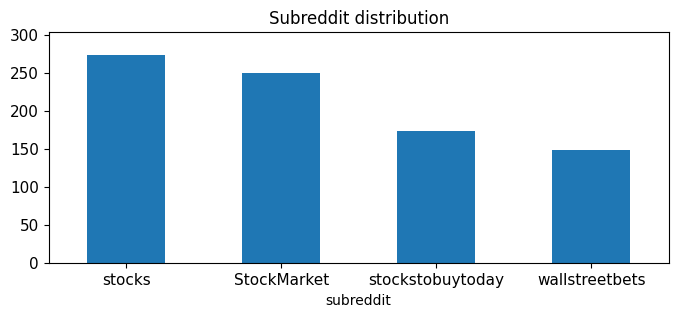

In [87]:
import matplotlib.pyplot as plt

print(df.subreddit.value_counts())

# plot barchart for X
df.subreddit.value_counts().plot(kind = 'bar',
                                title = 'Subreddit distribution',
                                ylim = [0, df.subreddit.value_counts().max()+30],        
                                rot = 0, fontsize = 11, figsize = (8,3))

                   df  df_sample
subreddit                       
StockMarket       250        124
stocks            274        120
stockstobuytoday  174         80
wallstreetbets    149         76


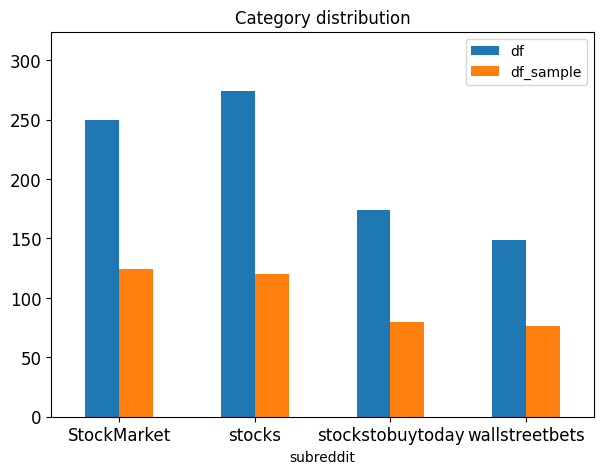

In [88]:
# Answer here
df_all = pd.DataFrame ({
    'df': df.subreddit.value_counts(),
    'df_sample': df_sample.subreddit.value_counts()})

df_all = df_all.loc[df_all.sum(axis=1).index]
print(df_all)

df_all.plot(
    kind = 'bar',
    title = 'Category distribution',
    ylim = [0, df.subreddit.value_counts().max()+50], 
    rot = 0, fontsize = 12, figsize = (7,5))

plt.show()

In [89]:
import helpers.data_mining_helpers as dmh

nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text_subreddit(x))

In [91]:
df.head()

type         subreddit                author  upvotes  \
0  comment    wallstreetbets          StickyTip420        0   
1  comment    wallstreetbets  Comfortable-Dog-8437      -15   
2  comment       StockMarket          Btankersly66        1   
3     post  stockstobuytoday             emiljenfn       30   
4  comment       StockMarket          Just-Big6411        1   

                                                text  sentiment  \
0                                   Calls on retards       -1.0   
1  Stunt as in like why did they even make a big ...        1.0   
2                  Seeing lots of red in the ticker.        0.0   
3  Vision Marine Technologies Inc. is rewriting t...        1.0   
4                           He didn’t say thank you.        0.0   

                                            entities sentiment_label  \
0                                                 []         Bearish   
1              ['Stunt', 'company', 'deal', 'place']         Bullish   
2                                         ['ticker']         Neutral   
3  ['watercraft', 'skill', 'power', ']', 'feat', ...         Bullish   
4                                                 []         Neutral   

                                            unigrams  
0                                   [Calls, retards]  
1  [Stunt, like, even, make, big, deal, starting,...  
2                     [Seeing, lots, red, ticker, .]  
3  [Vision, Marine, Technologies, Inc., rewriting...  
4                                 [’, say, thank, .]

In [92]:
df[0:4]["unigrams"]

0                                     [Calls, retards]
1    [Stunt, like, even, make, big, deal, starting,...
2                       [Seeing, lots, red, ticker, .]
3    [Vision, Marine, Technologies, Inc., rewriting...
Name: unigrams, dtype: object

In [98]:
count_vect = CountVectorizer(
    tokenizer=lambda text: dmh.tokenize_text_subreddit(text, remove_stopwords=True),
)
df_counts = count_vect.fit_transform(df['text'])

C:\Users\BK\Data_Mining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [99]:
print(count_vect.get_feature_names_out()[3696])
print(count_vect.get_feature_names_out()[175])
print(count_vect.get_feature_names_out()[675])

stewart
3306
bottom


In [100]:
analyze = count_vect.build_analyzer()
analyze(df.text[1])

['stunt',
 'like',
 'even',
 'make',
 'big',
 'deal',
 'starting',
 'first',
 'place',
 '?',
 'company',
 'ever',
 'talk',
 'politics',
 'ever',
 '.']

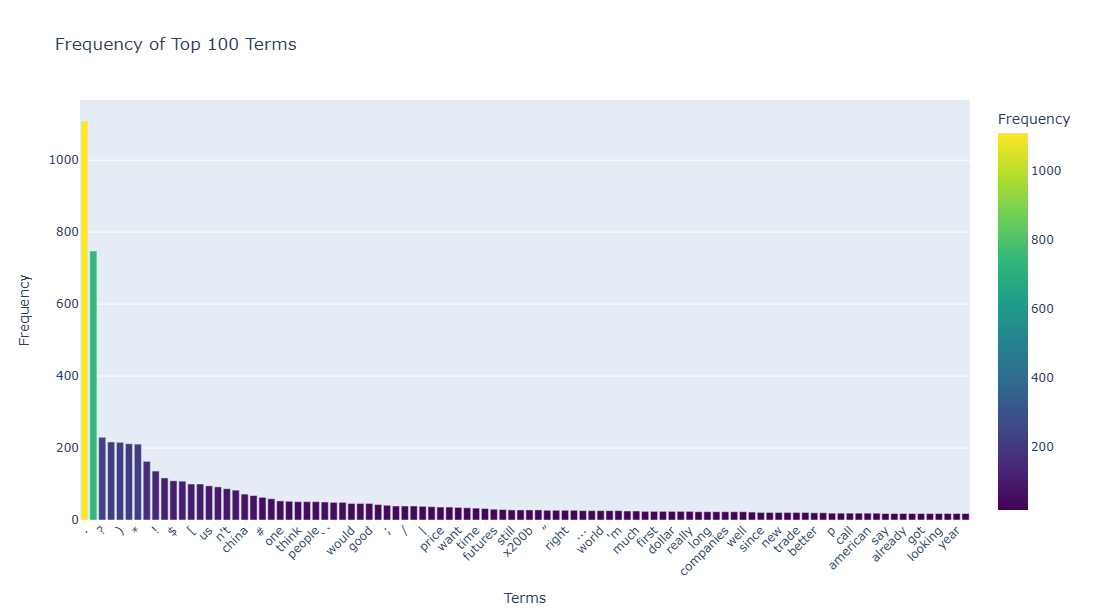

In [101]:
# Answer here
import plotly.express as px

term_frequency = np.asarray(df_counts.sum(axis=0))[0]
top_n = 100
top_indices = term_frequency.argsort()[-top_n:][::-1]

df_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[top_indices],
    'Frequency': term_frequency[top_indices]
})

# Create interactive bar chart
fig = px.bar(
    df_terms,
    x='Term',
    y='Frequency',
    title=f'Frequency of Top {top_n} Terms',
    labels={'Term': 'Terms', 'Frequency': 'Frequency'},
    color='Frequency',
    color_continuous_scale='Viridis'
)

# Improve layout for readability
fig.update_layout(
    xaxis_tickangle=-45,           # slightly rotated for readability
    height=600,                     # taller for more space
    width=1200,                     # wider for many bars
    showlegend=False                # optional: hide legend if not needed
)

# Optional: Add hover info
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Frequency: %{y}<extra></extra>"
)

fig.show()

# Phase 2

In [97]:
### Begin Assignment Here